### t-Tests 18th October

In [ ]:
A t test is a statistical test.
It looks for differences between two sets of numbers, compares the distributions.
A t-Test is a standard test across many disciplines.
In the lecture it was demonstrated how more data makes it easier to see patterns at a glance.

See also the wikipedia page for t test originally attributed to the person with pyseudonom "Student"

$t$-tests are among the most common statistical tests performed in world.

This notebook focuses on the practicalities of performing $t$-tests in Python.

For information about the $t$-test itself, I recommend reading Laerd Statistics's Independent t-test using SPSS Statistics.


#### Packages

One of Python's strengths is the quality of numerical packages available.

In [3]:
import numpy as np #efficent numerical arrays,lists of lists of numbers
import pandas as pd #excel for python, good for spreadsheets and dataframes
import statsmodels.stats.weightstats as stat #extra/alternative stats package
import scipy.stats as ss#similar to above,more functionality with scipy though
import matplotlib.pyplot as plt#basic plots
import seaborn as sns#higher level plots

plt.style.use("fivethirtyeight")#reference to Nate Silver
# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

#### Simulate Data Values

We can create fake data sets with specific properties to investigate numerical methods.



In [4]:
#generate two lists of random variables
#initialised in one statement (a python feature)
#m = mean or average
#s = standard deviation
#parameters for two different lists of numbers
m_a, s_a, m_b, s_b = 1.0, 0.4, 2.0, 0.4
N = 40 #sample size
#generate lists of numbers a and b!
#random numbers with a normal distribution - bell shaped curve.
#location m_a and m_b
#scale set at 0.4
#40 numbers, please.
a = np.random.normal(loc=m_a, scale=s_a, size=N)
b = np.random.normal(loc=m_b, scale=s_b, size=N)

# Stick both samples in one data frame.
df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})
#command to create a dataframe A beside the a numbers etc.
# We can look directly at the list of numbers, but it's not very illuminating.
df

,Category,Value
0,A,0.468710
1,A,0.981482
2,A,1.257702
3,A,1.002267
4,A,0.873150
...,...,...
75,B,2.028507
76,B,1.393896
77,B,2.572353
78,B,1.990273


#### Plot Data

A good plot can quickly show us what the numbers look like.<br>
One type of plot available in seaborn.

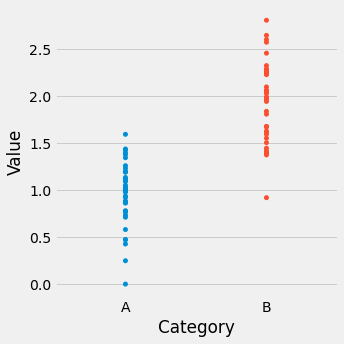

In [16]:
sns.catplot(x='Category', y='Value', jitter=False, data=df);

### $t_$Test
Running a t-test in Python is done with a single function call. You can use scipy or statsmodels, amongst others.

In [6]:
# The scipy.stats version.
#It is straightforward - a single call to a single package
#Are the numbers from different sources and NOT bunched around the same points
t_ss, p_ss = ss.ttest_ind(a, b)#ss.ttest_ind is the function
#typically you are most interested in the p value - a standard in statistics
print(f"P_scipy: {p_ss:0.2f}")
#a result of 0.00- the probability is zero
#the test is what is the probability of the two lists having the same mean, have an underlying distribution
#sometimes you can see it obviously in the plot but it is good to test anyway and have EVIDENCE
#0.05 5% is all you allow for

P_scipy: 0.00


In [18]:
#statsmodels version
# test statistic, pvalue of the t-test, degrees of freedom used in the t-test
#the same idea here from the stats model package 
t_sm, p_sm, d_sm = stat.ttest_ind(a, b)
print(f"P_statsmodels: {p_sm:0.2f}")
d_sm

P_statsmodels: 0.10


198.0

#### Visualisation
Visualisation of populations
$t$-tests perform calculations on samples from two populations to test whether the populations are likely similar.

In the real world, we only see the samples and we cannot see the populations.

In the plot below, the blue line represents column a, with a high probability of 1.<br>
The test is checking is the tip of both curves at the same point, or not.<br>
<br>
The second plot<br>
the t distribution, it demonstrates that the output of a test test is a t value, a statistic and you can see if the two means are equal. Assuming that they coincide, what arethe chances of them being the same?  the red point on that 2nd plot is the risk of making a wrong decision 5% - low risk<br>
<br>
It is easy to run the code.<br> The hard part is to really understand the input and interpret the output.<br>
The human side is tricksy!



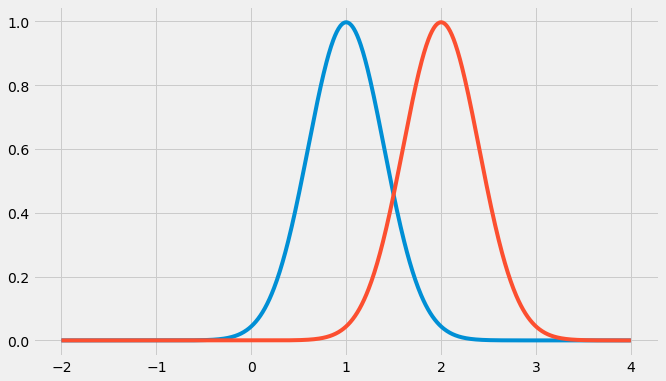

In [9]:

# Let's create a plot with the following x values.

# We'll have plots of two different populations on one set of axes.

x = np.linspace(-2.0, 4.0, 1000)

y_a = ss.norm.pdf(x, m_a, s_a)
y_b = ss.norm.pdf(x, m_b, s_b)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y_a)
ax.plot(x, y_b)

plt.show()

The critical value is used to make a decision regarding the calculation of the $t$ statistic from the samples.

If the probability of seeing such a $t$ value given the hypothesis that there is no difference between the means, then data is suggesting that you should reject that hypothesis.

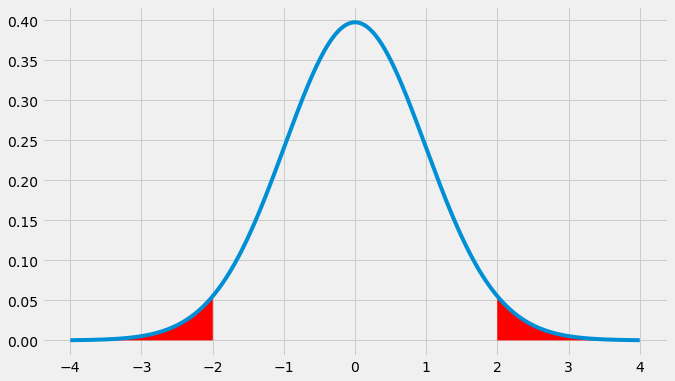

In [10]:
x_t = np.linspace(-4.0, 4.0, 1000)
t = ss.t.pdf(x_t, d)
tf = pd.DataFrame({'x': x_t, 't': t})

tcrit = abs(ss.t.ppf(0.025, d))
one = tf[tf['x'] >= tcrit]
two = tf[tf['x'] <= -tcrit]

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x_t, t)
ax.fill_between(one['x'], one['t'], 0, facecolor="red")
ax.fill_between(two['x'], two['t'], 0, facecolor="red")

plt.show()

#### Type I errors - false positives
The chance of a false negative is harder to quantify - it depends on how close the means are.

The errors are the thing that enable the statistics to be produced.
A statistical test attempts to manage the errors , to quantify them.
See first t-test below.
Reject - the idea that the centre point is equal.
You set it up for false positives @ 5%



In [12]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.0, 0.3
rejects = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] <= 0.05:#5% chance to say they are different,5% of the time the data will suggest that they are not the same.
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

4.76%


#### Type II errors - false negatives

In [ ]:
False negatives are more difficult to generate, harder to quantify.
(false positives are built in.)
Depend on difference between the two values.
It is worthy considering the uncertainty.


In [14]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.1, 0.3
dont = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] <= 0.05:
        dont = dont + 1

typeii = 100.0 * (dont / trials)
print(f"{typeii:0.2f}%")

65.31%


#### Paired Samples

In [ ]:

References for this section:

Vincent Arel-Bundock's R datasets list

t-test: Comparing Group Means

Paired Samples depend on one another.<br>
Extract the columns and compare using the paired sample t test.<br>
Here we try a slightly different $t$ test - one based on repeated measures.


In [15]:
dfsleep = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv")
dfsleep

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


In [27]:
drugA = dfsleep[dfsleep["group"] == 1]
drugA = drugA.sort_values("ID")
drugA = drugA["extra"].to_numpy()
drugA

array([ 0.7, -1.6, -0.2, -1.2, -0.1,  3.4,  3.7,  0.8,  0. ,  2. ])

In [24]:
drugB = dfsleep[dfsleep["group"] == 2]
drugB = drugB.sort_values("ID")
drugB = drugB["extra"].to_numpy()
drugB

array([ 1.9,  0.8,  1.1,  0.1, -0.1,  4.4,  5.5,  1.6,  4.6,  3.4])

In [26]:
ss.ttest_rel(drugA, drugB)
#rather than A and B being totally separate, they are the same sources with an intervention in between.

NameError: name 'drugA' is not defined

In [ ]:
ss.ttest_1samp(drugB - drugA, 0)

In [ ]:
stat.DescrStatsW(drugB - drugA).ttest_mean(0)

#### Suggestion that another dataset is chosen and go through the steps above on this new dataset in order to re-inforce the concepts that have been covered in this topic.

#### Samples and populations

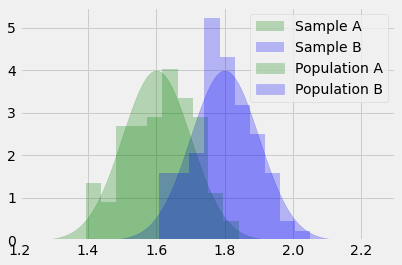

In [20]:
# Set parameters for two populations.
popA = {'m': 1.6, 's': 0.1}
popB = {'m': 1.8, 's': 0.1}

# Create two samples, one from each population.
sampA = np.random.normal(popA['m'], popA['s'], 100)
sampB = np.random.normal(popB['m'], popB['s'], 100)

# x values for plotting.
x = np.linspace(1.25, 2.25, 1000)

# The probability density functions (PDFs) for the two populations.
pdfA = ss.norm.pdf(x, popA['m'], popA['s'])
pdfB = ss.norm.pdf(x, popB['m'], popB['s'])

# Plot the population PDFs as shaded regions.
plt.fill_between(x, pdfA, color='g', alpha=0.25, label="Population A")
plt.fill_between(x, pdfB, color='b', alpha=0.25, label="Population B")

# Plot histograms of the two samples.
plt.hist(sampA, density=True, color='g', alpha=0.25, label="Sample A")
plt.hist(sampB, density=True, color='b', alpha=0.25, label="Sample B")

# Display a legend.
plt.legend()
plt.show()

In [ ]:
observation of above: sample of green and blue values mimic the population values.


#### Problems with multiple $t$-tests
Suppose we want to compare three groups. Can three $t$ tests be run in parallel?
<br>
Checking the difference between the three sample groups.<br>
The 5% error rate can impact on the false positive rate, it will be worse than 5% but probably not as high as 15%.<br>


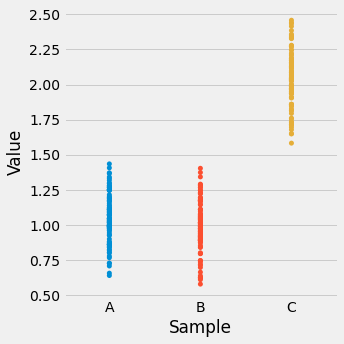

In [21]:
# Size of each sample.
N = 100

# Create three samples.
sampA = np.random.normal(1.0, 0.2, N)
sampB = np.random.normal(1.0, 0.2, N)
sampC = np.random.normal(2.0, 0.2, N)

# Put samples in a single data frame.
sample = ['A'] * N + ['B'] * N + ['C'] * N
values = np.hstack([sampA, sampB, sampC])
dfsamps = pd.DataFrame({'Sample': sample, 'Value': values})

# Visualise samples.
sns.catplot(x='Sample', y='Value', jitter=False, data=dfsamps);

In [ ]:
# t-Tests
t_AB, p_AB = ss.ttest_ind(sampA, sampB)
t_AC, p_AC = ss.ttest_ind(sampA, sampC)
t_BC, p_BC = ss.ttest_ind(sampB, sampC)

print(f"p_AB: {p_AB:.2f}\tp_AC: {p_AC:.2f}\tp_BC: {p_BC:.2f}")

In [22]:
# Let's run 1000 tests, remembering our Type I errors.

falsepos = 0

for i in range(1000):
    A = np.random.normal(1.0, 0.2, N)
    B = np.random.normal(1.0, 0.2, N)
    C = np.random.normal(1.0, 0.2, N)
    t_AB, p_AB = ss.ttest_ind(A, B)
    t_AC, p_AC = ss.ttest_ind(A, C)
    t_BC, p_BC = ss.ttest_ind(A, C)
    if p_AB <= 0.05 or p_AC <= 0.05 or p_BC <= 0.05:
        falsepos = falsepos + 1

print(f"False positive rate: {falsepos / 10}%")

False positive rate: 9.1%


#### Analaysis of Variance (ANOVA)¶
ANOVA can be used to avoid a higher Type I error rate.<br>
like a t test but designed to handled multiple sources.

In [28]:
F, P = ss.f_oneway(sampA, sampB, sampC)
print(f"{P:.2f}")

0.00
